# Calculate robusteness from pi control runs

In [1]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [2]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [3]:
file = './counts copy.xlsx' # obs indices.xlsx'
df = pd.read_excel(file)
#df = df.rename(columns={'cclme_SSTA_hydro_ann':'CC_SST','nino_hydro_ann':'NINO','pdsi_anom_ann_hydro':'CA_PDSI','ca_pr_anom_hydro_ann':'CA_PRCP', 'goa_SSTA_hydro_ann':'GOA_SST', 'GOA_SSTA_6mo':'GOA_SST_6mo' ,'goa_SSTA_hydro_ann_12mo': 'GOA_SST_LEAD'  })
df.iloc[:,12:17]#.scen#.iloc[:,0:5]

,order.2,var.2,Number of co-occurrence per century.2,err.2,sce.2
0,m,Hot GOA + dry CA,0.115,0.239,piControl
1,n,Hot GOA + dry CA,4.360,NaN,"Future(SSP5-8.5,2070-2099)"
2,bb,NaN,NaN,NaN,NaN
3,o,Hot CC + dry CA,0.080,0.190,piControl
4,p,Hot CC + dry CA,4.360,NaN,"Future(SSP5-8.5,2070-2099)"
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'co-occurrence per decade')

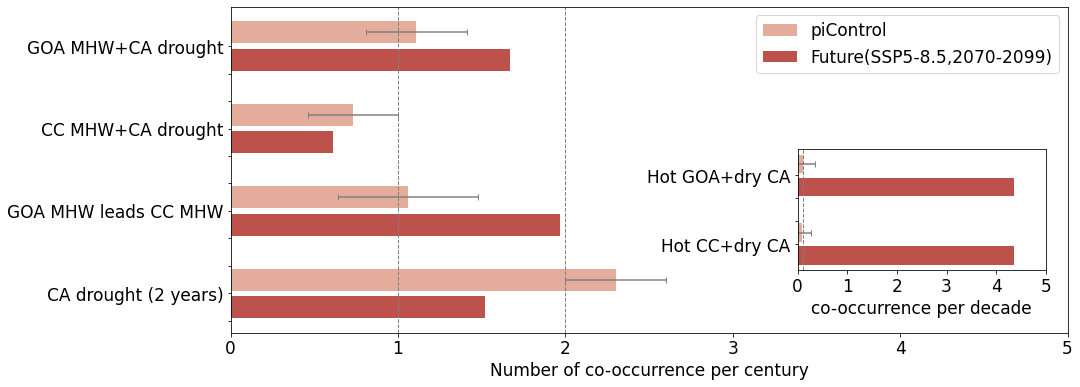

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax1 = plt.subplots(figsize=(15,6))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.27, 0.23, 0.14*2]
ax2 = f.add_axes([left, bottom, width, height])


# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
palette=plt.get_cmap('YlOrRd').reversed()
#'YlOrRd''rocket_r''ch:25''colorblind'
sns.barplot(x="Number of co-occurrence per century", y="order", hue='sce', palette='Reds', data=df.iloc[:,0:5],
              dodge=False, saturation=.6,ax=ax1)

for i in range(3):
    ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3], y=i*3, xerr=df["err"].iloc[i*3], color='gray',capsize=3)
i=3
ax1.errorbar(df["Number of co-occurrence per century"].iloc[i*3], y=i*3, xerr=df["err"].iloc[i*3], color='gray',capsize=3)#,label="MME UNC.")   

ax1.axvline(x=1,color="gray",linestyle='--',linewidth=1)#,zorder=0) ymin=0.25,ymax=1.,
ax1.axvline(x=2,color="gray",linestyle='--',linewidth=1)#,zorder=0) ymin=0,ymax=0.25,


ax1.legend(fontsize=17)
ax1.set_yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
ax1.set_yticklabels(["GOA MHW+CA drought","","","CC MHW+CA drought","","","GOA MHW leads CC MHW","","","CA drought (2 years)",""] ,fontsize=17)
ax1.set_ylabel('',fontsize=17)
ax1.set_xlim(0,5)
ax1.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax1.set_xlabel("Number of co-occurrence per century",fontsize=17)
#sns.despine(left=True, bottom=True)


bar2=sns.barplot(x="Number of co-occurrence per century.2", y="order.2", hue='sce.2', palette='Reds', data=df.iloc[:,11:17],
              dodge=False,saturation=.6, ax=ax2) #alpha=.3

for i in range(3):
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3], y=i*3, xerr=df["err.2"].iloc[i*3], color='gray',capsize=3)
    ax2.errorbar(df["Number of co-occurrence per century.2"].iloc[i*3+2], y=i*3+2, xerr=df["err.2"].iloc[i*3+2], color='gray',capsize=3)


ax2.axvline(x=.1,color="gray",linestyle='--',linewidth=1)#,zorder=0) 

ax2.legend("",frameon=False)
#ax2.set_yticklabels(["Drought+GOA lead CC MHW",""] ,fontsize=17)
#ax2.set_yticklabels(["","",""] ,fontsize=17)
ax2.set_yticks([0.5,1.5,2.5,3.5])
ax2.set_yticklabels(["Hot GOA+dry CA","","","Hot CC+dry CA",""],fontsize=17)

ax2.set_ylabel("",fontsize=17)
ax2.set_xlim(0,5)
ax2.set_xticklabels(["0","1","2","3","4","5"],fontsize=17)
ax2.set_xlabel("co-occurrence per decade",fontsize=17)



